<a href="https://colab.research.google.com/github/OleksijShtoltz/machine-learning/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимые библиотеки

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
from google.colab import drive
from seaborn import heatmap
from seaborn import pairplot
import warnings
warnings.filterwarnings("ignore")

#Загрузка и обработка данных

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = Path("/content/drive/MyDrive/Data/Lermontova")

In [ ]:
df = pd.concat([pd.read_csv(filepath_or_buffer=f, sep=';', encoding='cp1251', decimal=',') for f in data_dir.glob("*.csv")], ignore_index=True)

Удаляем из датафрейма пустые столбцы

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37240 entries, 0 to 37239
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Время            37240 non-null  object 
 1   CO, мг/м3        37240 non-null  object 
 2   NO, мг/м3        37239 non-null  object 
 3   NO2, мг/м3       37240 non-null  object 
 4   SO2, мг/м3       37240 non-null  object 
 5   H2S, мг/м3       37240 non-null  object 
 6   O3, мг/м3        37240 non-null  object 
 7   NH3, мг/м3       37240 non-null  object 
 8   Сумма CH, мг/м3  37240 non-null  object 
 9   CH4, мг/м3       37240 non-null  object 
 10  PM10, мг/м3      37240 non-null  object 
 11  PM2.5, мг/м3     37240 non-null  object 
 12  T, °С            37240 non-null  object 
 13  H, %             37240 non-null  object 
 14  P, мм.рт.ст.     37240 non-null  object 
 15  V, м/с           37240 non-null  object 
 16  N, град          37240 non-null  object 
 17  Т зонд 1, °C

In [ ]:
df

,Время,"CO, мг/м3","NO, мг/м3","NO2, мг/м3","SO2, мг/м3","H2S, мг/м3","O3, мг/м3","NH3, мг/м3","Сумма CH, мг/м3","CH4, мг/м3",...,"P, мм.рт.ст.","V, м/с","N, град","Т зонд 1, °C","Т зонд 2, °C","Т пав, 'C","U, В",Вскрытие,Пожар,Unnamed: 23
0,01.02.15 00:19,2.019,0.207,0.103,"0,016","0,0043",---,---,---,---,...,729.8,0.0,Штиль,19,25.0,18.24,229.47,0,0,NaN
1,01.02.15 00:39,2.319,0.235,0.098,"0,024","0,0067",---,---,---,---,...,729.8,0.0,Штиль,19,25.0,19.21,230.9,0,0,NaN
2,01.02.15 00:59,2.245,0.214,0.096,"0,027","0,0069",---,---,---,---,...,729.9,0.0,Штиль,"19,86",25.0,19.86,229.95,0,0,NaN
3,01.02.15 01:19,2.824,0.254,0.096,"0,031","0,0081",---,---,---,---,...,730.0,0.0,Штиль,20,26.0,20.48,230.31,0,0,NaN
4,01.02.15 01:39,2.686,0.269,0.098,"0,028","0,0086",---,---,---,---,...,730.2,0.0,Штиль,21,26.59,21.05,231.3,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37235,31.08.14 22:39,1.622,0.121,0.058,0.005,0.0009,---,---,---,---,...,724.1,0.0,Штиль,17,17.0,16.04,227.92,0,0,NaN
37236,31.08.14 22:59,1.168,0.086,0.045,0.004,0.0011,---,---,---,---,...,724.2,0.1,Штиль,17,17.0,16.09,228.79,0,0,NaN
37237,31.08.14 23:19,0.827,0.047,0.033,0.003,0.0006,---,---,---,---,...,724.2,0.2,Штиль,17,17.0,16.16,232.55,0,0,NaN
37238,31.08.14 23:39,0.902,0.045,0.042,0.002,0.0005,---,---,---,---,...,724.1,0.0,Штиль,17,17.0,15.87,232.74,0,0,NaN


In [ ]:
df.drop(['NH3, мг/м3', 'Сумма CH, мг/м3', 'CH4, мг/м3',
         'Вскрытие', 'Пожар', 'Unnamed: 23',# 'Unnamed: 13',
         'N, град', 'PM2.5, мг/м3', 'H2S, мг/м3', 'O3, мг/м3', "Т пав, 'C"
         ], axis=1, inplace=True)

Отсортируем по времени

In [ ]:
df['Время'] = pd.to_datetime(df['Время'])
df.sort_values(by = 'Время', inplace=True)

In [ ]:
df

,Время,"CO, мг/м3","NO, мг/м3","NO2, мг/м3","SO2, мг/м3","PM10, мг/м3","T, °С","H, %","P, мм.рт.ст.","V, м/с","Т зонд 1, °C","Т зонд 2, °C","U, В"
23470,2014-01-09 00:19:00,"0,762","0,051","0,043","0,002",нет связи,"9,41","77,6",724,"0,0",17,17,"235,25"
23471,2014-01-09 00:39:00,"0,903","0,085","0,043","0,002",нет связи,"9,23","76,2",724,"0,0",17,17,"222,18"
23472,2014-01-09 00:59:00,"1,213","0,072","0,048","0,002",нет связи,"8,61",78,"723,9",0,17,17,"226,44"
23473,2014-01-09 01:19:00,"0,898","0,059","0,049","0,002",нет связи,"8,41","76,8","723,7",0,17,17,"225,68"
23474,2014-01-09 01:39:00,"1,161","0,057","0,043","0,002",нет связи,"8,01","79,2","723,7",0,17,17,"222,48"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32832,2016-12-01 22:39:00,"2,164","0,131","0,072","0,075","0,302",-21.97,78.1,734.0,0.0,19,19,216
32833,2016-12-01 22:59:00,"2,478","0,14","0,08","0,082","0,302",-22.13,77.3,733.8,0.0,19,19,"217,5"
32834,2016-12-01 23:19:00,"2,159","0,123","0,07","0,08","0,302",-22.17,76.7,733.6,0.0,19,19,"221,54"
32835,2016-12-01 23:39:00,"2,16","0,111","0,071","0,078","0,302",-21.91,77.2,733.4,0.0,19,"19,06","219,73"


Исключаем Ошибочные данные

In [ ]:
incorrect = ['нет связи', 'Ошибка', 'Откл.', 'нет в БД', ' ---', 'Кaлибр.', 'Отказ', 'no', 'Нестаб', '--']

In [ ]:
def replace_incorrect(x):
  x = str(x)
  if x in incorrect or x == '':
    return np.nan
  else:
    x = float(str(x).replace(',', '.'))
    return x

In [ ]:
for column in df.columns:
  if column == 'Время':
    continue
  df[column] = df[column].apply(replace_incorrect)
df = df.dropna()

In [ ]:
df

,Время,"CO, мг/м3","NO, мг/м3","NO2, мг/м3","SO2, мг/м3","PM10, мг/м3","T, °С","H, %","P, мм.рт.ст.","V, м/с","Т зонд 1, °C","Т зонд 2, °C","U, В"
12910,2014-01-10 00:19:00,2.190,0.109,0.054,0.000,0.073,2.71,68.6,723.0,0.0,25.57,26.58,227.16
12911,2014-01-10 00:39:00,2.167,0.101,0.056,0.000,0.073,2.80,68.7,723.1,0.0,26.67,27.67,228.00
12912,2014-01-10 00:59:00,1.440,0.039,0.041,0.000,0.073,2.65,69.9,723.1,0.0,27.00,28.31,229.93
12913,2014-01-10 01:19:00,1.352,0.036,0.031,0.000,0.073,2.25,72.0,723.1,0.0,27.80,29.00,229.69
12914,2014-01-10 01:39:00,1.507,0.060,0.045,0.000,0.073,1.94,73.6,723.1,0.0,28.00,29.00,230.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32831,2016-12-01 22:19:00,2.037,0.105,0.072,0.077,0.302,-22.02,78.1,734.3,0.1,19.00,19.00,216.08
32832,2016-12-01 22:39:00,2.164,0.131,0.072,0.075,0.302,-21.97,78.1,734.0,0.0,19.00,19.00,216.00
32833,2016-12-01 22:59:00,2.478,0.140,0.080,0.082,0.302,-22.13,77.3,733.8,0.0,19.00,19.00,217.50
32834,2016-12-01 23:19:00,2.159,0.123,0.070,0.080,0.302,-22.17,76.7,733.6,0.0,19.00,19.00,221.54


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34204 entries, 12910 to 32835
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Время         34204 non-null  datetime64[ns]
 1   CO, мг/м3     34204 non-null  float64       
 2   NO, мг/м3     34204 non-null  float64       
 3   NO2, мг/м3    34204 non-null  float64       
 4   SO2, мг/м3    34204 non-null  float64       
 5   PM10, мг/м3   34204 non-null  float64       
 6   T, °С         34204 non-null  float64       
 7   H, %          34204 non-null  float64       
 8   P, мм.рт.ст.  34204 non-null  float64       
 9   V, м/с        34204 non-null  float64       
 10  Т зонд 1, °C  34204 non-null  float64       
 11  Т зонд 2, °C  34204 non-null  float64       
 12  U, В          34204 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 3.7 MB


Усредняем данные по дням

In [ ]:
df_day = df.copy()

In [ ]:
df_day = df_day.set_index('Время').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')


In [ ]:
df_day

,"CO, мг/м3","NO, мг/м3","NO2, мг/м3","SO2, мг/м3","PM10, мг/м3","T, °С","H, %","P, мм.рт.ст.","V, м/с","Т зонд 1, °C","Т зонд 2, °C","U, В"
Время,,,,,,,,,,,,
2014-01-10,1.557447,0.109579,0.041553,0.000974,0.064868,1.875000,82.907895,723.597368,0.065789,30.037632,30.877895,227.360789
2014-01-11,1.127718,0.168070,0.053408,0.025099,0.118761,-0.269718,64.056338,725.192958,0.185915,35.624225,40.723099,222.663380
2014-01-12,1.558153,0.148486,0.059722,0.036444,0.057639,-23.301944,72.431944,731.516667,0.147222,20.704028,26.964028,224.889306
2014-02-10,0.951868,0.112735,0.051529,0.002441,0.076206,7.637353,61.367647,721.022059,0.301471,24.958529,25.093676,215.889118
2014-02-11,1.347857,0.179286,0.056457,0.013171,0.062871,0.054286,71.102857,722.018571,0.034286,36.581286,41.733571,223.260429
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-01,1.420183,0.082000,0.066408,0.075521,0.201901,-20.339577,77.353521,729.819718,0.092958,19.000000,19.035070,221.268732
2016-09-01,0.951099,0.066535,0.066338,0.181732,0.182085,-18.881127,78.978873,734.209859,0.126761,19.000000,19.023944,222.706761
2016-10-01,1.472314,0.106314,0.060871,0.061943,0.080029,-25.071286,74.382857,738.827143,0.052857,18.431429,19.012429,221.427000


Усредняем данные по месяцам

In [ ]:
df_mounth = df.copy()
df_mounth = df_mounth.set_index('Время').groupby(pd.Grouper(freq='m')).mean().dropna(how='all')

In [ ]:
df_mounth

,"CO, мг/м3","NO, мг/м3","NO2, мг/м3","SO2, мг/м3","PM10, мг/м3","T, °С","H, %","P, мм.рт.ст.","V, м/с","Т зонд 1, °C","Т зонд 2, °C","U, В"
Время,,,,,,,,,,,,
2014-01-31,1.389160,0.148000,0.053431,0.024547,0.083133,-8.981436,71.345856,727.373481,0.145304,28.516243,33.182928,224.535028
2014-02-28,1.561428,0.176731,0.061038,0.021466,0.089471,-5.311394,69.770192,726.098077,0.138942,27.418317,31.307163,220.757308
2014-03-31,1.425122,0.167297,0.056297,0.030514,0.103716,-1.860000,73.145270,723.937162,0.153378,29.290405,32.813716,226.560068
2014-04-30,1.297106,0.085439,0.044976,0.020341,0.110553,1.071951,67.562602,724.353659,0.513821,33.412520,36.565122,226.083415
2014-05-31,1.606913,0.141983,0.055331,0.005930,0.090593,-1.671977,69.251744,727.500581,0.310465,27.061744,30.330058,224.556337
2014-06-30,1.104103,0.125670,0.048222,0.012376,0.080686,-5.147113,74.182990,730.247938,0.228351,27.098144,31.491443,225.987371
2014-07-31,1.971507,0.160394,0.059019,0.013028,0.071803,-4.684272,79.129108,724.060563,0.168075,25.492441,29.455728,226.041878
2014-08-31,1.814810,0.178815,0.061720,0.015640,0.165804,-5.696190,82.439683,723.433333,0.064021,24.671111,29.184180,225.515873
2014-09-30,1.310037,0.109645,0.044841,0.010555,0.070454,5.820359,70.953228,723.871019,0.285868,25.632195,26.305359,226.666370


Усредняем данные по неделям

In [ ]:
df_week = df.copy()
df_week = df_week.set_index('Время').groupby(pd.Grouper(freq='w')).mean().dropna(how='all')


In [ ]:
df_week

,"CO, мг/м3","NO, мг/м3","NO2, мг/м3","SO2, мг/м3","PM10, мг/м3","T, °С","H, %","P, мм.рт.ст.","V, м/с","Т зонд 1, °C","Т зонд 2, °C","U, В"
Время,,,,,,,,,,,,
2014-01-12,1.389160,0.148000,0.053431,0.024547,0.083133,-8.981436,71.345856,727.373481,0.145304,28.516243,33.182928,224.535028
2014-02-16,1.561428,0.176731,0.061038,0.021466,0.089471,-5.311394,69.770192,726.098077,0.138942,27.418317,31.307163,220.757308
2014-03-16,1.425122,0.167297,0.056297,0.030514,0.103716,-1.860000,73.145270,723.937162,0.153378,29.290405,32.813716,226.560068
2014-04-13,1.297106,0.085439,0.044976,0.020341,0.110553,1.071951,67.562602,724.353659,0.513821,33.412520,36.565122,226.083415
2014-05-11,1.946303,0.131514,0.050789,0.006465,0.083415,1.216127,67.852113,726.604930,0.357746,29.048380,31.772042,225.176972
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-07,1.420183,0.082000,0.066408,0.075521,0.201901,-20.339577,77.353521,729.819718,0.092958,19.000000,19.035070,221.268732
2016-09-04,0.951099,0.066535,0.066338,0.181732,0.182085,-18.881127,78.978873,734.209859,0.126761,19.000000,19.023944,222.706761
2016-10-02,1.472314,0.106314,0.060871,0.061943,0.080029,-25.071286,74.382857,738.827143,0.052857,18.431429,19.012429,221.427000


#Первичный анализ

##Первичная оценка датасета

In [ ]:
df.shape

(34204, 13)

In [ ]:
df.describe()

,"CO, мг/м3","NO, мг/м3","NO2, мг/м3","SO2, мг/м3","PM10, мг/м3","T, °С","H, %","P, мм.рт.ст.","V, м/с","Т зонд 1, °C","Т зонд 2, °C","U, В"
count,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000
mean,1.125848,0.105683,0.054858,0.026538,0.063745,0.104020,68.740507,723.854374,0.338791,22.586188,24.557717,226.724409
std,1.022522,0.151819,0.085482,0.051913,0.044051,14.086525,18.451926,7.181608,0.467721,4.545878,5.561650,6.599318
min,0.000000,0.000000,0.000000,0.000000,0.000000,-33.940000,12.600000,704.100000,0.000000,10.000000,12.840000,0.000000
25%,0.486000,0.020000,0.032000,0.005000,0.036000,-10.410000,58.100000,718.600000,0.000000,19.570000,19.930000,223.780000
50%,0.801000,0.052000,0.049000,0.011000,0.054000,-0.480000,73.700000,723.500000,0.100000,21.000000,23.000000,227.360000
75%,1.381000,0.117000,0.069000,0.028000,0.078000,11.490000,82.400000,728.500000,0.500000,23.000000,28.000000,230.412500
max,8.826000,2.638000,14.713000,2.062000,0.573000,35.680000,97.000000,749.900000,4.100000,40.000000,44.000000,237.790000


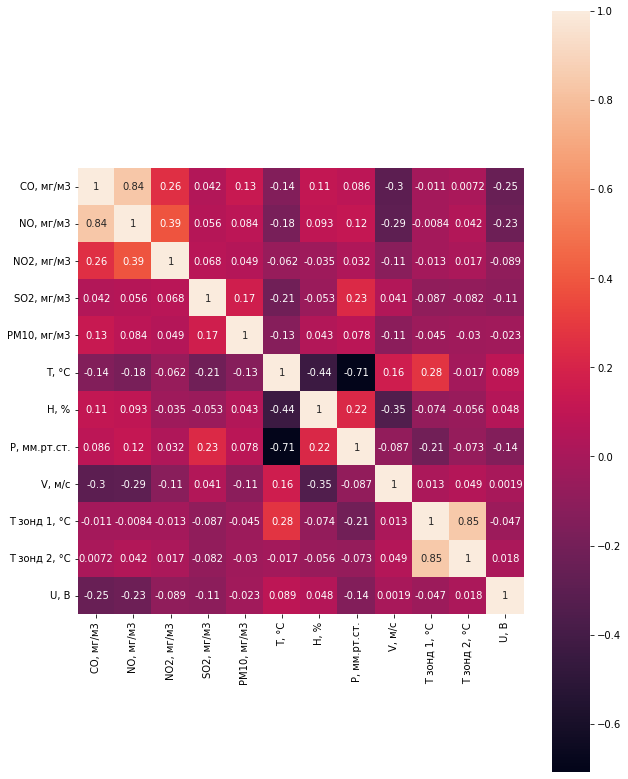

In [ ]:
fig, ax = plt.subplots(figsize=(10,14))
heatmap(df.corr(), square=True, annot=True, ax=ax)

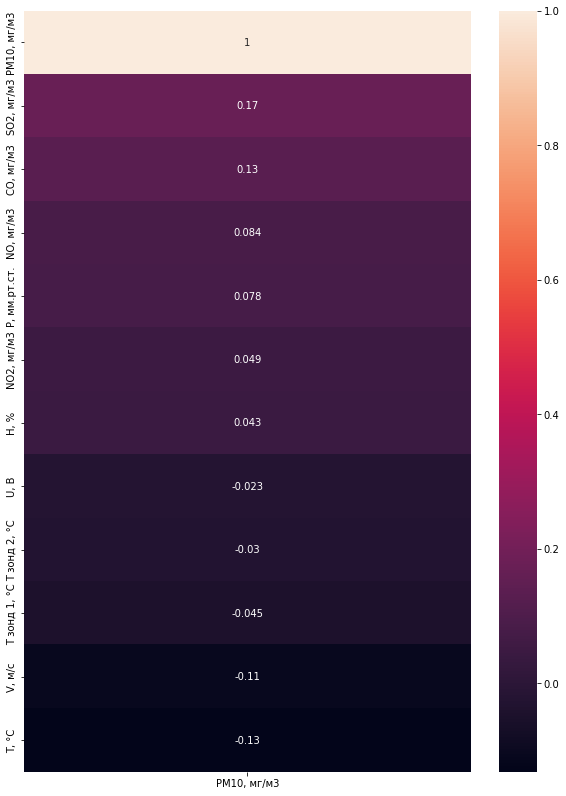

In [ ]:
fig, ax = plt.subplots(figsize=(10,14))
PM10_corr = df.corr()[['PM10, мг/м3']].sort_values(
  by='PM10, мг/м3', ascending=False)
heatmap(PM10_corr, annot=True, ax=ax)

##Исключение выбросов

In [ ]:
df.describe()

,"CO, мг/м3","NO, мг/м3","NO2, мг/м3","SO2, мг/м3","PM10, мг/м3","T, °С","H, %","P, мм.рт.ст.","V, м/с","Т зонд 1, °C","Т зонд 2, °C","U, В"
count,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000,34204.000000
mean,1.125848,0.105683,0.054858,0.026538,0.063745,0.104020,68.740507,723.854374,0.338791,22.586188,24.557717,226.724409
std,1.022522,0.151819,0.085482,0.051913,0.044051,14.086525,18.451926,7.181608,0.467721,4.545878,5.561650,6.599318
min,0.000000,0.000000,0.000000,0.000000,0.000000,-33.940000,12.600000,704.100000,0.000000,10.000000,12.840000,0.000000
25%,0.486000,0.020000,0.032000,0.005000,0.036000,-10.410000,58.100000,718.600000,0.000000,19.570000,19.930000,223.780000
50%,0.801000,0.052000,0.049000,0.011000,0.054000,-0.480000,73.700000,723.500000,0.100000,21.000000,23.000000,227.360000
75%,1.381000,0.117000,0.069000,0.028000,0.078000,11.490000,82.400000,728.500000,0.500000,23.000000,28.000000,230.412500
max,8.826000,2.638000,14.713000,2.062000,0.573000,35.680000,97.000000,749.900000,4.100000,40.000000,44.000000,237.790000


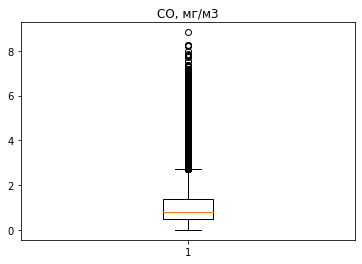

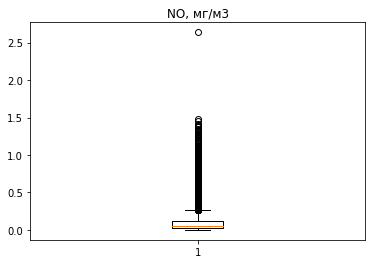

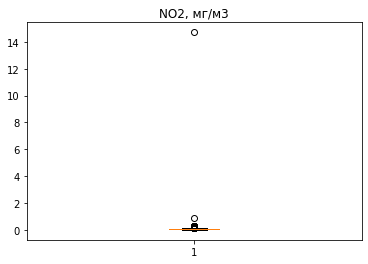

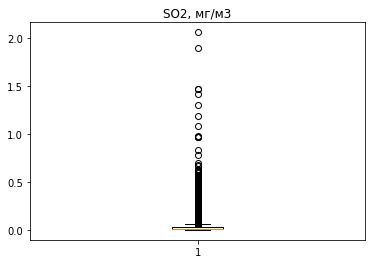

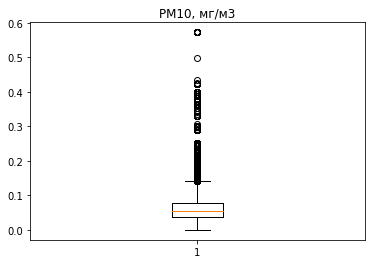

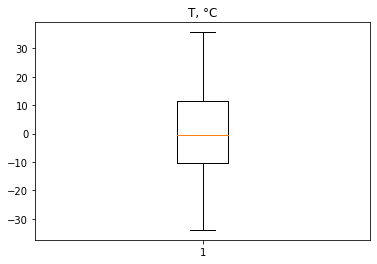

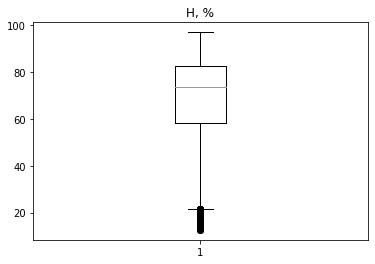

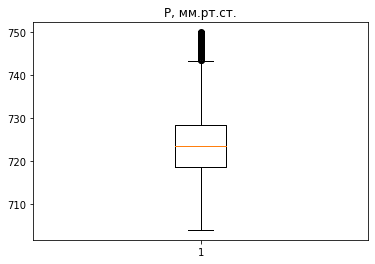

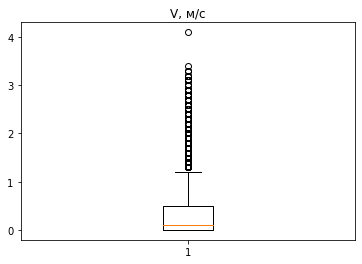

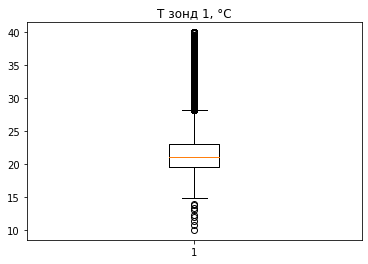

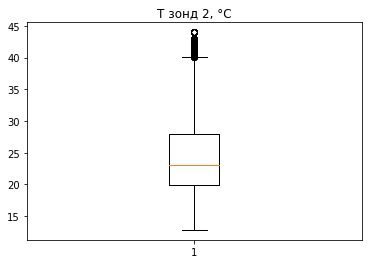

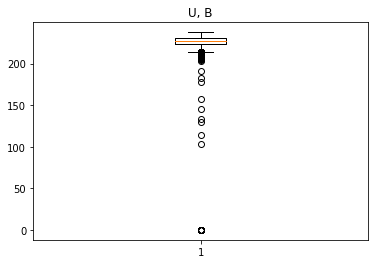

In [ ]:
for column in df.columns[1:]:
  plt.title(column)
  plt.boxplot(df[column])
  plt.show()

In [ ]:
df.shape

(34204, 13)

In [ ]:
for column in df.columns:
  
  Q1 = df[column].quantile(q=0.25)
  Q3 = df[column].quantile(q=0.75)
  IQR = Q3 - Q1
  df.loc[df[column] < Q1-1.5*IQR, column] = np.nan
  df.loc[df[column] > Q3+1.5*IQR, column] = np.nan
  #if column != 'T, °С':
  #  df.loc[df[column] == 0, column] = np.nan

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(20911, 13)

Данные усреднённые по дням

In [ ]:
df_day = df.copy()
df_day = df_day.set_index('Время').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 453 entries, 2014-01-10 to 2016-10-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO, мг/м3     453 non-null    float64
 1   NO, мг/м3     453 non-null    float64
 2   NO2, мг/м3    453 non-null    float64
 3   SO2, мг/м3    453 non-null    float64
 4   PM10, мг/м3   453 non-null    float64
 5   T, °С         453 non-null    float64
 6   H, %          453 non-null    float64
 7   P, мм.рт.ст.  453 non-null    float64
 8   V, м/с        453 non-null    float64
 9   Т зонд 1, °C  453 non-null    float64
 10  Т зонд 2, °C  453 non-null    float64
 11  U, В          453 non-null    float64
dtypes: float64(12)
memory usage: 46.0 KB


Данные усреднённые по неделям

In [ ]:
df_week = df.copy()
df_week = df_week.set_index('Время').groupby(pd.Grouper(freq='w')).mean().dropna(how='all')


##Визуальный анализ

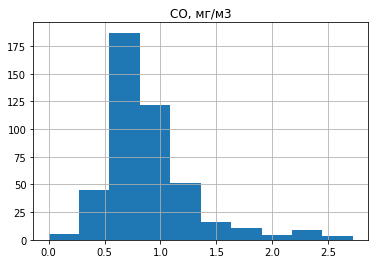

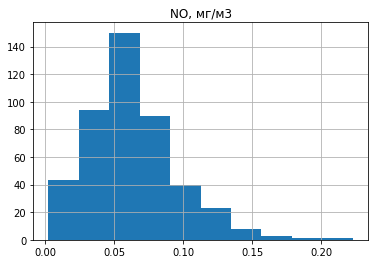

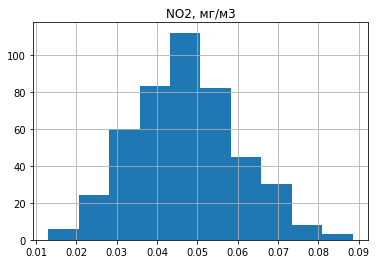

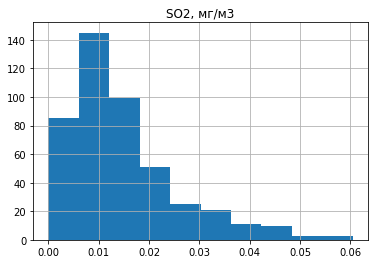

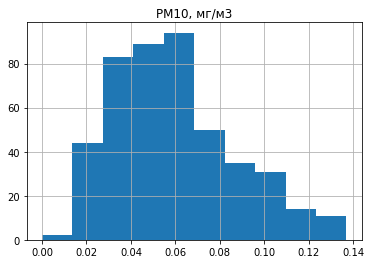

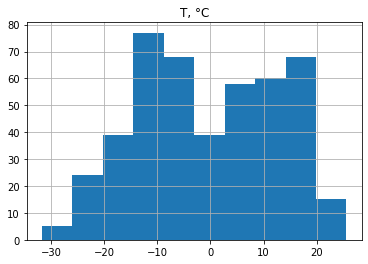

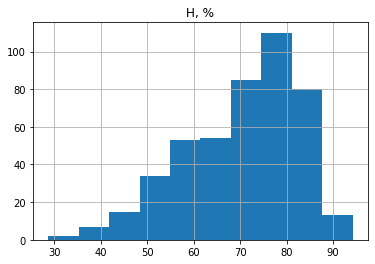

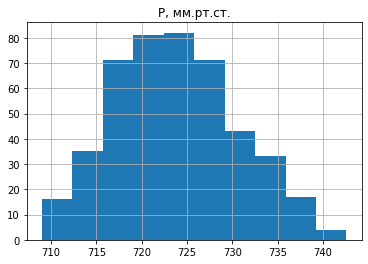

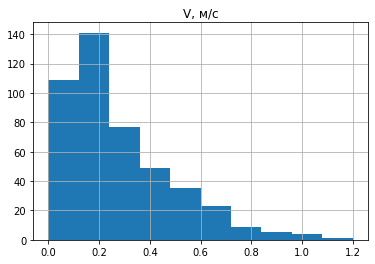

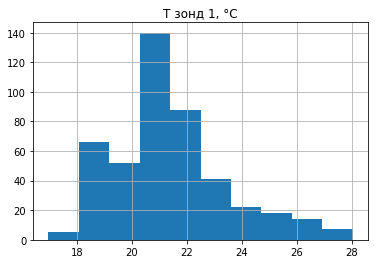

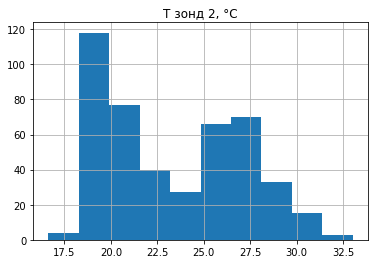

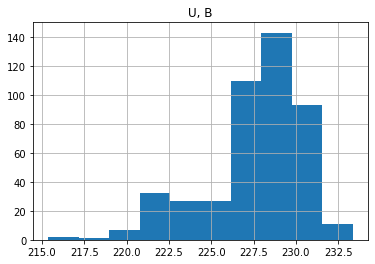

In [ ]:
for column in df_day.columns:
  df_day[column].hist()
  plt.title(column)
  plt.show()

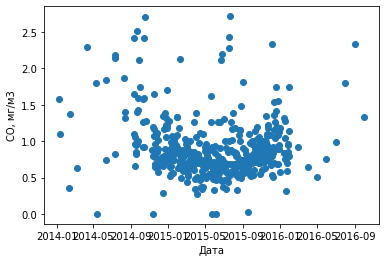

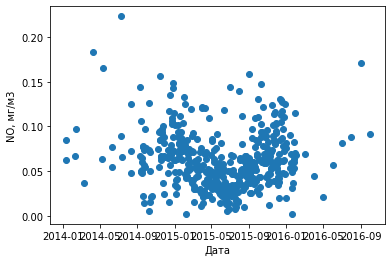

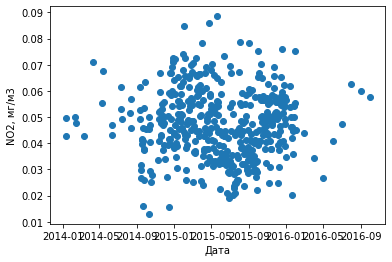

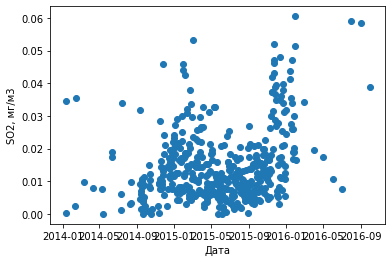

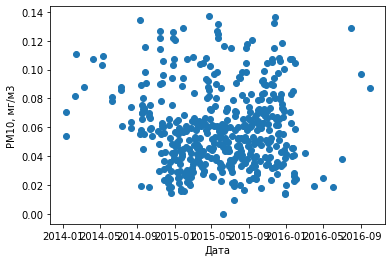

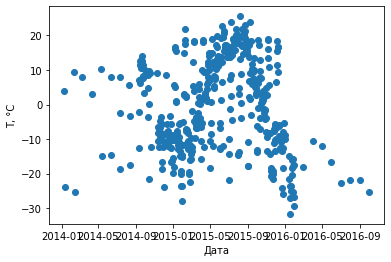

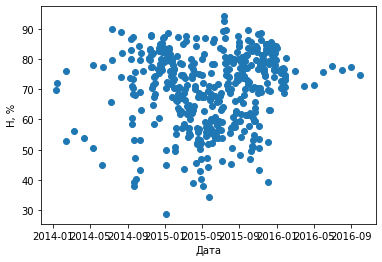

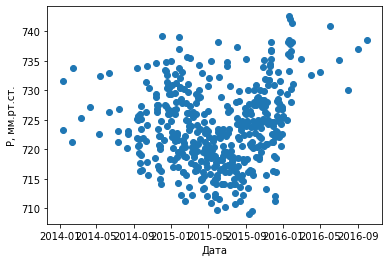

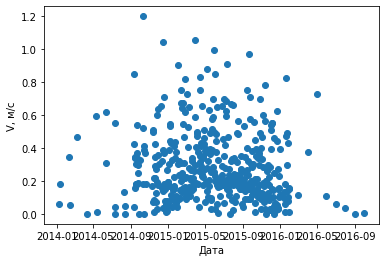

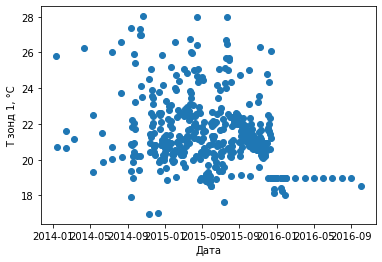

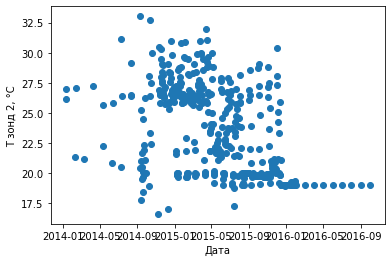

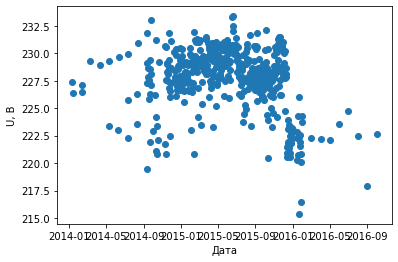

In [ ]:
for column in df_day.columns:
  plt.scatter(df_day.index, df_day[column])
  plt.xlabel('Дата')
  plt.ylabel(column)
  plt.show()

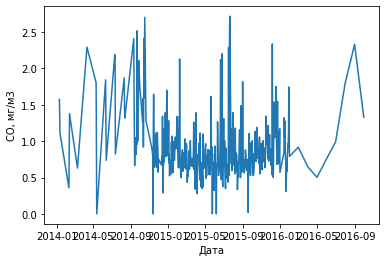

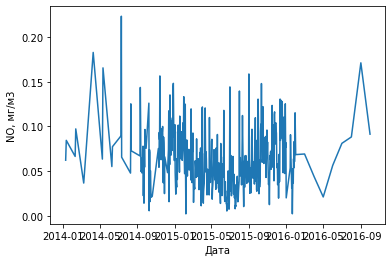

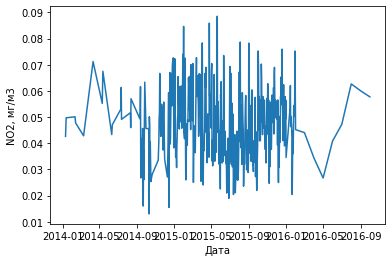

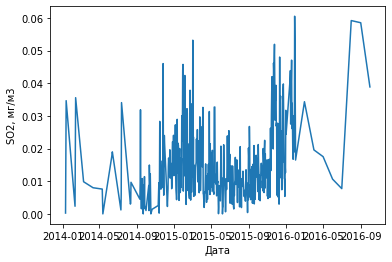

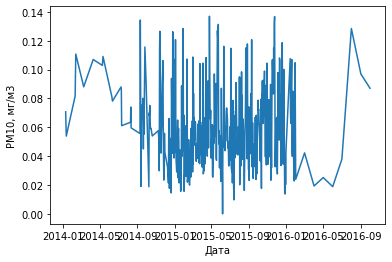

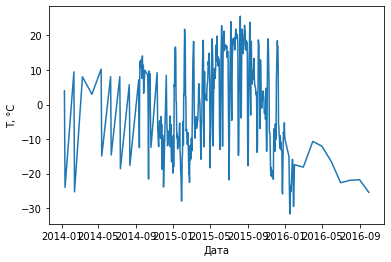

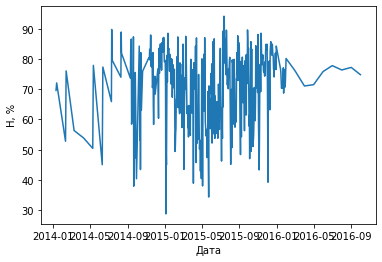

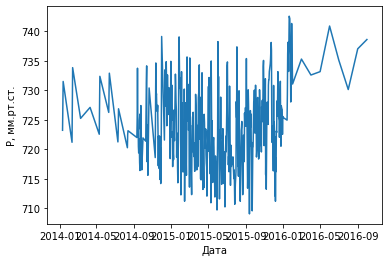

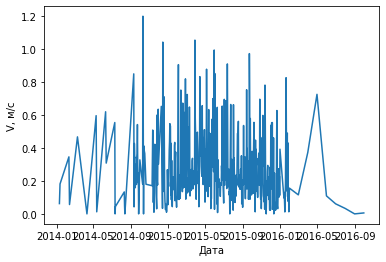

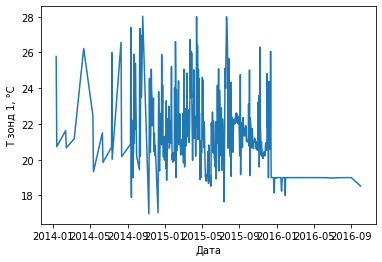

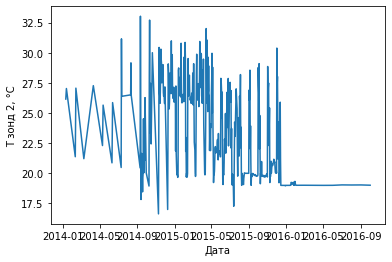

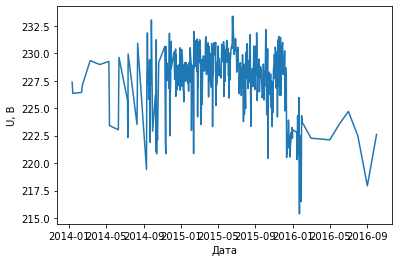

In [ ]:
for column in df_day.columns:
  plt.plot(df_day.index, df_day[column])
  plt.xlabel('Дата')
  plt.ylabel(column)
  plt.show()

##Корреляция

Матрица попарных корреляций

In [ ]:
df_day

,"CO, мг/м3","NO, мг/м3","NO2, мг/м3","SO2, мг/м3","PM10, мг/м3","T, °С","H, %","P, мм.рт.ст.","V, м/с","Т зонд 1, °C","Т зонд 2, °C","U, В"
Время,,,,,,,,,,,,
2014-01-10,1.577500,0.062375,0.042625,0.000250,0.070750,3.973750,69.625000,723.212500,0.062500,25.776250,26.153750,227.361250
2014-01-12,1.105163,0.084531,0.049714,0.034653,0.053918,-23.991429,72.116327,731.504082,0.181633,20.733061,27.029388,226.345306
2014-02-10,0.359385,0.066590,0.050103,0.002333,0.081667,9.458718,52.784615,721.174359,0.346154,21.630769,21.373333,226.433077
2014-02-12,1.378267,0.097300,0.047733,0.035567,0.110767,-25.262000,76.090000,733.853333,0.056667,20.664667,27.059333,227.075000
2014-03-10,0.630351,0.036892,0.042838,0.009838,0.088054,8.011892,56.345946,725.235135,0.467568,21.172703,21.211351,229.326486
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-01,0.754426,0.056574,0.040870,0.010630,0.018870,-16.613519,75.890741,740.918519,0.109259,19.000000,19.003519,223.526481
2016-07-01,0.992659,0.081195,0.047171,0.007732,0.037951,-22.636585,77.841463,735.141463,0.060976,18.978293,19.037805,224.699756
2016-08-01,1.795333,0.088333,0.062667,0.059167,0.128500,-21.925000,76.400000,730.133333,0.033333,19.000000,19.030000,222.470000


In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 453 entries, 2014-01-10 to 2016-10-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO, мг/м3     453 non-null    float64
 1   NO, мг/м3     453 non-null    float64
 2   NO2, мг/м3    453 non-null    float64
 3   SO2, мг/м3    453 non-null    float64
 4   PM10, мг/м3   453 non-null    float64
 5   T, °С         453 non-null    float64
 6   H, %          453 non-null    float64
 7   P, мм.рт.ст.  453 non-null    float64
 8   V, м/с        453 non-null    float64
 9   Т зонд 1, °C  453 non-null    float64
 10  Т зонд 2, °C  453 non-null    float64
 11  U, В          453 non-null    float64
dtypes: float64(12)
memory usage: 46.0 KB


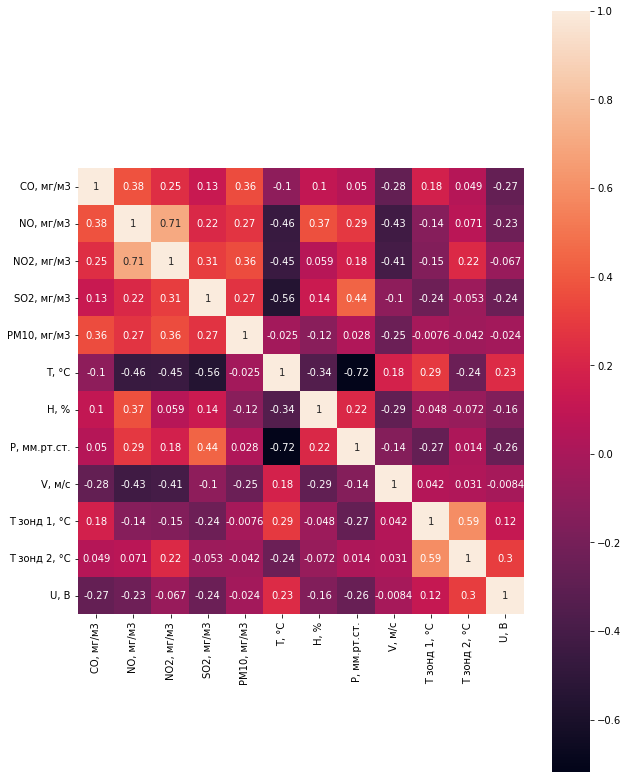

In [ ]:
fig, ax = plt.subplots(figsize=(10,14))
heatmap(df_day.corr(), square=True, annot=True, ax=ax)

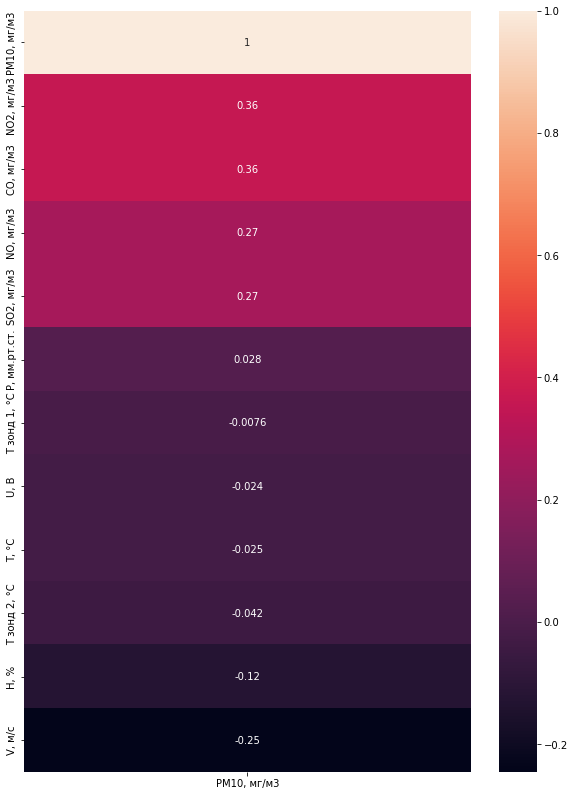

In [ ]:
fig, ax = plt.subplots(figsize=(10,14))
PM10_corr = df_day.corr()[['PM10, мг/м3']].sort_values(
  by='PM10, мг/м3', ascending=False)
heatmap(PM10_corr, annot=True, ax=ax)

Удаляем коррелирующие признаки

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 453 entries, 2014-01-10 to 2016-10-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO, мг/м3     453 non-null    float64
 1   NO, мг/м3     453 non-null    float64
 2   NO2, мг/м3    453 non-null    float64
 3   SO2, мг/м3    453 non-null    float64
 4   PM10, мг/м3   453 non-null    float64
 5   T, °С         453 non-null    float64
 6   H, %          453 non-null    float64
 7   P, мм.рт.ст.  453 non-null    float64
 8   V, м/с        453 non-null    float64
 9   Т зонд 1, °C  453 non-null    float64
 10  Т зонд 2, °C  453 non-null    float64
 11  U, В          453 non-null    float64
dtypes: float64(12)
memory usage: 46.0 KB


In [ ]:
#'H, %', 'V, м/с', 'T, °С', 

In [ ]:
df_day = df_day.drop(['Т зонд 1, °C', 'Т зонд 2, °C', 'U, В', "NO, мг/м3"], axis=1)

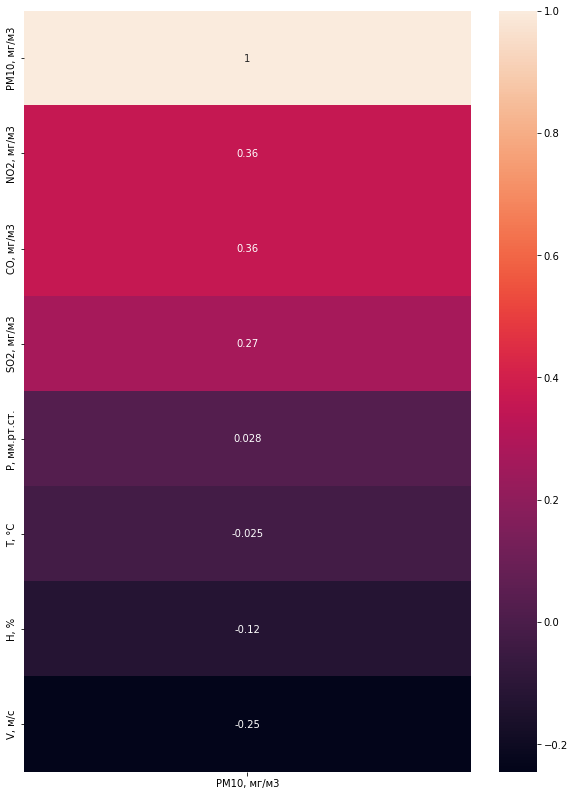

In [ ]:
fig, ax = plt.subplots(figsize=(10,14))
PM10_corr = df_day.corr()[['PM10, мг/м3']].sort_values(
  by='PM10, мг/м3', ascending=False)
heatmap(PM10_corr, annot=True, ax=ax)

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 453 entries, 2014-01-10 to 2016-10-01
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO, мг/м3     453 non-null    float64
 1   NO2, мг/м3    453 non-null    float64
 2   SO2, мг/м3    453 non-null    float64
 3   PM10, мг/м3   453 non-null    float64
 4   T, °С         453 non-null    float64
 5   H, %          453 non-null    float64
 6   P, мм.рт.ст.  453 non-null    float64
 7   V, м/с        453 non-null    float64
dtypes: float64(8)
memory usage: 31.9 KB


In [ ]:
#pairplot(df, diag_kind='kde')

#Прогнозирование

##Подготовка данных для обучения

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
test_results = pd.DataFrame()

Разбиение на обучающую и тестовую выборку

In [ ]:
X = np.matrix(df_day.drop(['PM10, мг/м3'], axis=1))
y = np.array(df_day['PM10, мг/м3'])

In [ ]:
#X = X*100
#y = y*100

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False,
                                                    test_size=0.2, random_state=10)

In [ ]:
time = df_day.index[-y_test.shape[0]:]

Нормализация данных

In [ ]:
df_day.describe().transpose()[['mean', 'std']]

,mean,std
"CO, мг/м3",0.899659,0.410421
"NO2, мг/м3",0.047494,0.013153
"SO2, мг/м3",0.014901,0.011244
"PM10, мг/м3",0.059110,0.027660
"T, °С",-0.357899,13.308291
"H, %",70.252426,12.459640
"P, мм.рт.ст.",723.808420,6.713214
"V, м/с",0.274090,0.215362


In [ ]:
normalizer = keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(X))

In [ ]:
print(normalizer.mean.numpy())

[[ 8.9965862e-01  4.7493730e-02  1.4901271e-02 -3.5789824e-01
   7.0252426e+01  7.2380841e+02  2.7408952e-01]]


Пример исходных данных и нормализоыванных

In [ ]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  1.58   0.04   0.     3.97  69.62 723.21   0.06]]

Normalized: [[ 1.65 -0.37 -1.3   0.33 -0.05 -0.09 -0.98]]


Функция для отрисовки графика ошибки во время обучения

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 0.05])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

##Линейная регрессия sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
print('Train score: ', reg.score(X_train, y_train))
reg.score(X_train, y_train)
print('Test score: ', reg.score(X_test, y_test))

Train score:  0.270278041884497
Test score:  0.35962872249654154


In [ ]:
y_reg_predict = reg.predict(X_test)

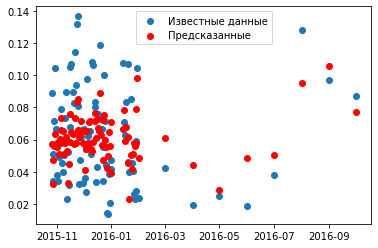

In [ ]:
plt.scatter(x = time, y = y_test, label='Известные данные')
plt.scatter(x = time, y = y_reg_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

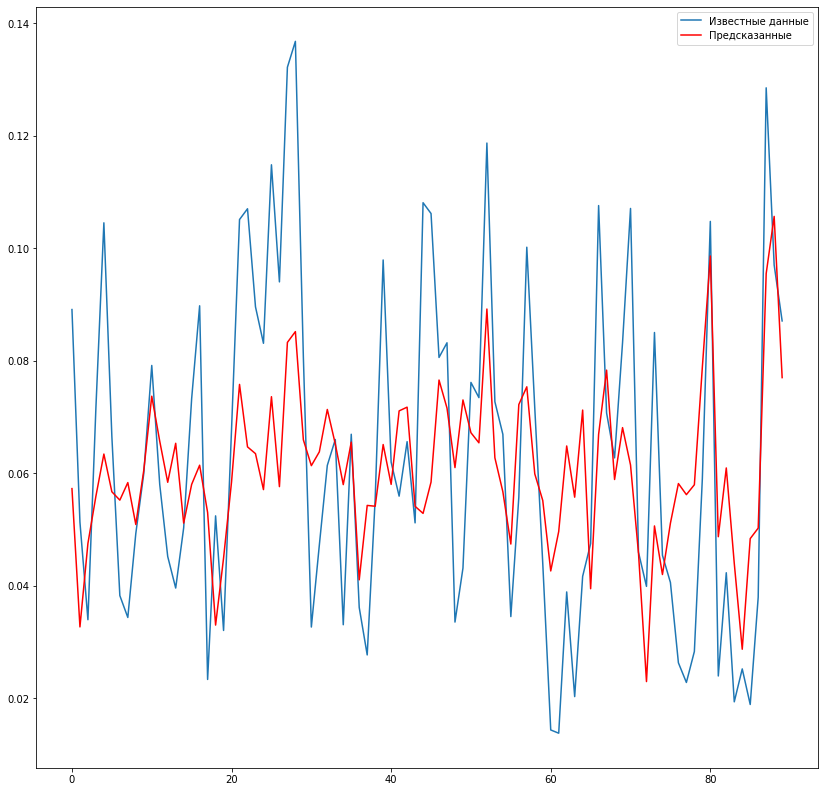

In [ ]:
plt.figure(figsize=(14, 14))
plt.plot(y_test, label='Известные данные')
plt.plot(y_reg_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

In [ ]:
mse = ((y_test - y_reg_predict)**2).sum()/len(y_test)

In [ ]:
mae = (abs(y_test - y_reg_predict)).sum()/len(y_test)

In [ ]:
print('mse: ', mse, '\nmae: ', mae)

mse:  0.000574377209931671 
mae:  0.019793534910404722


##Lasso регрессия

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
lasso_reg = Ridge(normalize=True)
lasso_reg.fit(X_train, y_train)
print('Train score: ', lasso_reg.score(X_train, y_train))
lasso_reg.score(X_train, y_train)
print('Test score: ', lasso_reg.score(X_test, y_test))

Train score:  0.2088646895761458
Test score:  0.22903321209573158


In [ ]:
y_lasso_reg_predict = lasso_reg.predict(X_test)

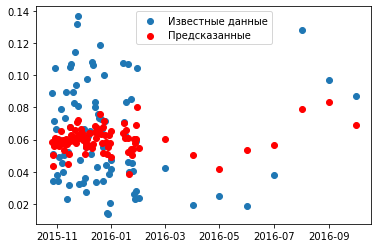

In [ ]:
plt.scatter(x = time, y = y_test, label='Известные данные')
plt.scatter(x = time, y = y_lasso_reg_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

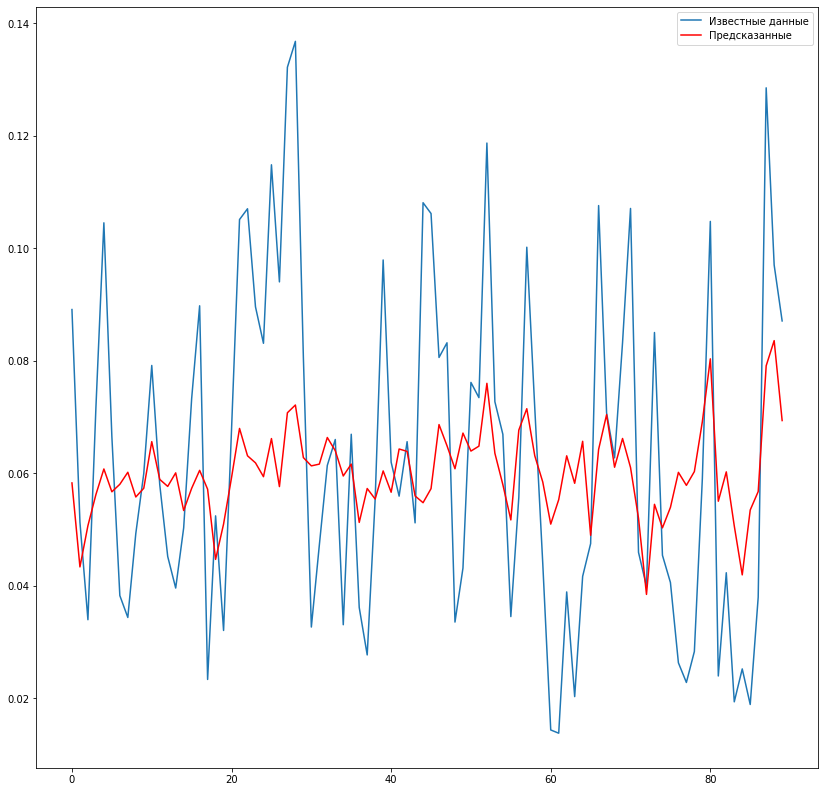

In [ ]:
plt.figure(figsize=(14, 14))
plt.plot(y_test, label='Известные данные')
plt.plot(y_lasso_reg_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

In [ ]:
mse = ((y_test - y_lasso_reg_predict)**2).sum()/len(y_test)

In [ ]:
mae = (abs(y_test - y_lasso_reg_predict)).sum()/len(y_test)

In [ ]:
print('mse: ', mse, '\nmae: ', mae)

mse:  0.000691514076510161 
mae:  0.021474611507711374


##Линейная регрессия TensorFlow

$y = mx + b$, где $m$ - матрица, $b$ - вектор

In [ ]:
linear_model = keras.Sequential([
    normalizer,
    keras.layers.Dense(units=1)
])

In [ ]:
linear_model.predict(X_test[:10])

array([[-1.0321654 ],
       [ 1.3646846 ],
       [ 2.063881  ],
       [-0.07706273],
       [-0.76973134],
       [ 0.32126468],
       [-1.4852021 ],
       [-0.8349948 ],
       [ 1.3241764 ],
       [ 3.332841  ]], dtype=float32)

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 4.52 s, sys: 400 ms, total: 4.92 s
Wall time: 5.42 s


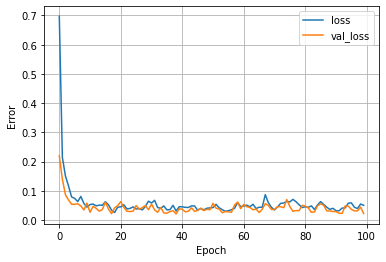

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    X_test, y_test, verbose=0)

In [ ]:
y_predict = linear_model.predict(X_test)

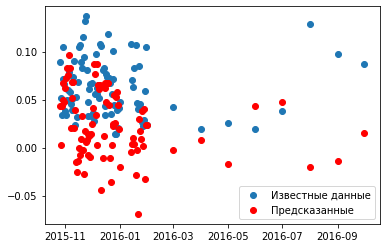

In [ ]:
plt.scatter(x = time, y = y_test, label='Известные данные')
plt.scatter(x = time, y = y_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

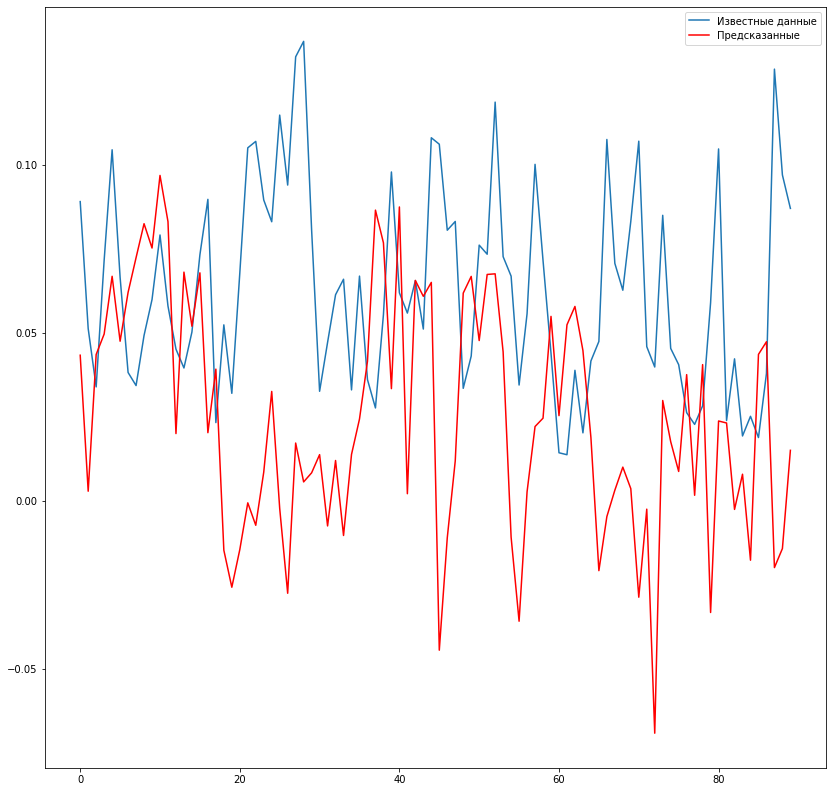

In [ ]:
plt.figure(figsize=(14, 14))
plt.plot(y_test, label='Известные данные')
plt.plot(y_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

In [ ]:
mse = ((y_test - y_predict)**2).sum()/len(y_test)

In [ ]:
mae = (abs(y_test - y_predict)).sum()/len(y_test)

In [ ]:
print('mse: ', mse, '\nmae: ', mae)

mse:  0.3215926742205306 
mae:  4.3596117006099275


##Нейронная сеть

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train.shape[1]))
model.add(keras.layers.BatchNormalization())
#model.add(normalizer)
model.add(keras.layers.Dense(64))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.01),
                             activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(1, activation='linear'))



In [ ]:
#log_cosh

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 dense_22 (Dense)            (None, 64)                512       
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                      

In [ ]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=200)

CPU times: user 9.95 s, sys: 697 ms, total: 10.6 s
Wall time: 9.23 s


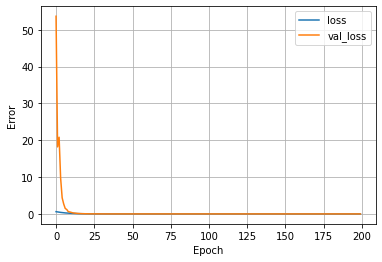

In [ ]:
plot_loss(history)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Data/диплом_итоговая_модель')

In [ ]:
y_predict = model.predict(X_test)
time = df_day.index[-y_predict.shape[0]:]

In [ ]:
y_predict = y_predict.reshape(1, -1)[0]

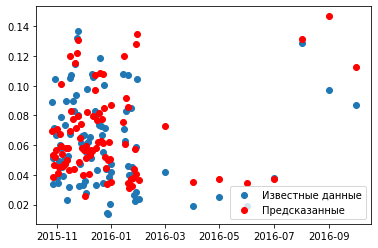

In [ ]:
plt.scatter(x = time, y = y_test, label='Известные данные')
plt.scatter(x = time, y = y_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

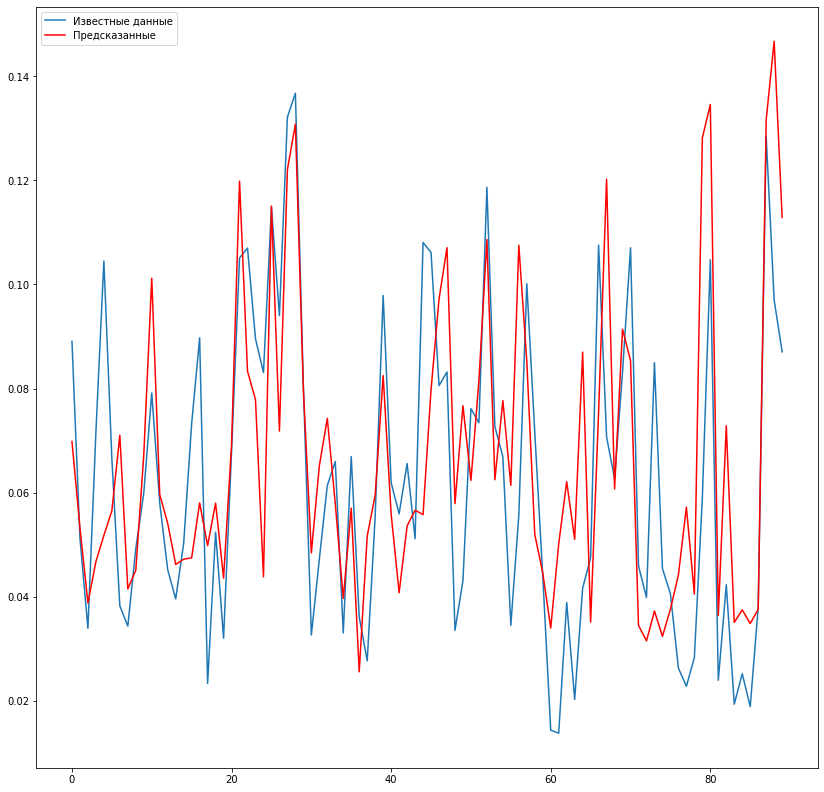

In [ ]:
plt.figure(figsize=(14, 14))
plt.plot(y_test, label='Известные данные')
#plt.show()
plt.plot(y_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

In [ ]:
mse = ((y_test - y_predict)**2).sum()/len(y_test)

In [ ]:
mae = (abs(y_test - y_predict)).sum()/len(y_test)

In [ ]:
print('mse: ', mse, '\nmae: ', mae)

mse:  0.0005396406760605879 
mae:  0.018231081658013435


In [ ]:
#model.save('/content/drive/MyDrive/Data/диплом_итоговая_модель')